<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.1.2
# *Exploring Data*

## Part 1: Continuous and Categorical Data

When we explore a dataset we usually produce textual and graphical output together, starting with a high-level overview of the data and gradually drilling down into the individual features and relationships between them.

Our most important libraries for this task are:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cause plots to be displayed in the notebook:
%matplotlib inline

In [3]:
# Set the default figure size
plt.rcParams['figure.figsize'] = (10, 6)
sns.set(color_codes = True)

## Data Profiling

We actually start profiling the data when we first load it and check for input errors, as in the last lab. Once we have a DataFrame we can work with, however, things start getting more interesting.

**Load the file "bikeshare.csv" into a DataFrame named `bikes`, and check that it was loaded properly:**

In [8]:
#ANSWER:
#Load the file "bikeshare.csv" and name as "bikes"
bikes = pd.read_csv('bikeshare.csv', index_col =0)
print(bikes.head())

             dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
instant                                                                   
1        2011-01-01       1   0     1   0        0        6           0   
2        2011-01-01       1   0     1   1        0        6           0   
3        2011-01-01       1   0     1   2        0        6           0   
4        2011-01-01       1   0     1   3        0        6           0   
5        2011-01-01       1   0     1   4        0        6           0   

         weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
instant                                                                      
1                 1  0.24  0.2879  0.81        0.0       3          13   16  
2                 1  0.22  0.2727  0.80        0.0       8          32   40  
3                 1  0.22  0.2727  0.80        0.0       5          27   32  
4                 1  0.24  0.2879  0.75        0.0       3          10   13  
5     

We may want our program to capture particular features of the dataset into variables, but if we just want to get a feel for the data it is easier to use a higher-level Pandas method like `describe()`:

**Use `describe` to get the description of datasets.**

In [11]:
#ANSWER:
#Check and validate the dataset
bikes.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Continuous Data

We may have to do a lot of work before we can produce presentable graphics, but we can start creating simple visualisations as soon as we have a DataFrame.

We usually start charting variables one-by-one (although when several have the same range it may be preferable to overlay them, using a different colour or symbol for each).

**Use the `scatter` method of Pandas to create a scatter plot of `windspeed`, `temp`:**

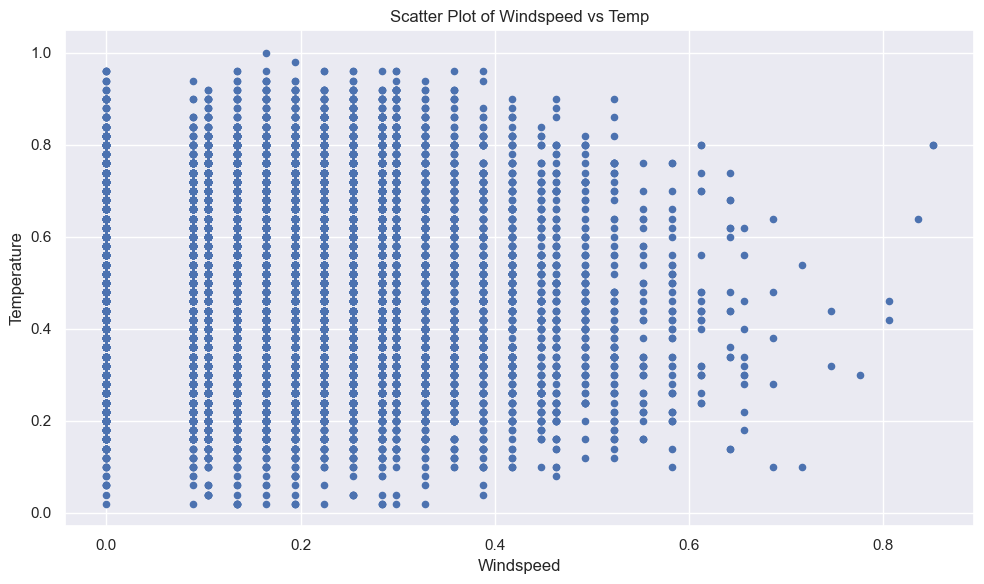

In [16]:
#ANSWER
#Create Scatter Plot of windspeed and temp variable
bikes.plot.scatter(x='windspeed', y='temp',
                   title = 'Scatter Plot of Windspeed vs Temp',
                   xlabel = 'Windspeed',
                   ylabel = 'Temperature')

#Display the Plot
plt.tight_layout() # adjust plot to prevent overlapping labels
plt.show()

**The `scatter` method has various parameters for controlling the appearance of the chart. Experiment with `s` , `linewidths`, and `alpha` below:**

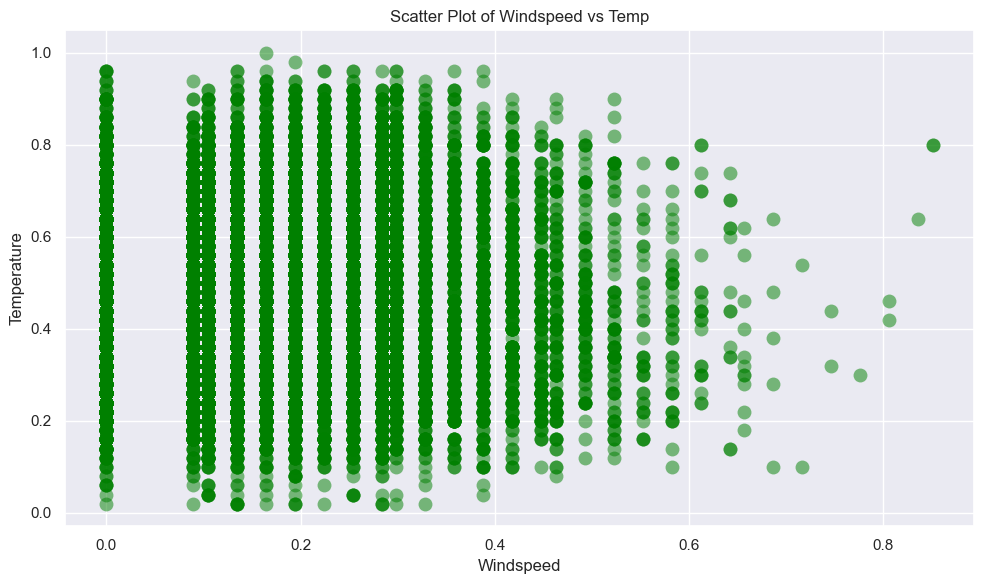

In [19]:
#ANSWER
#Experiment with other parameter for scatterplot
bikes.plot.scatter(x='windspeed', y='temp',
                   s=100,
                   linewidths =0,
                   alpha = 0.5,
                   c='green',
                   title = 'Scatter Plot of Windspeed vs Temp',
                   xlabel = 'Windspeed',
                   ylabel = 'Temperature')

#Display the Plot
plt.tight_layout() # adjust plot to prevent overlapping labels
plt.show()

The scatterplot shows us the raw data. Our next step is usually to see how it is distributed, which is what the histogram is for:

> A histogram is used for continuous data, where the bins represent ranges of data, while a bar chart is a plot of categorical variables. <sup>[1](#histfootnote)</sup>

- **Identify continuous variables**
- **Create histogram for those variables**

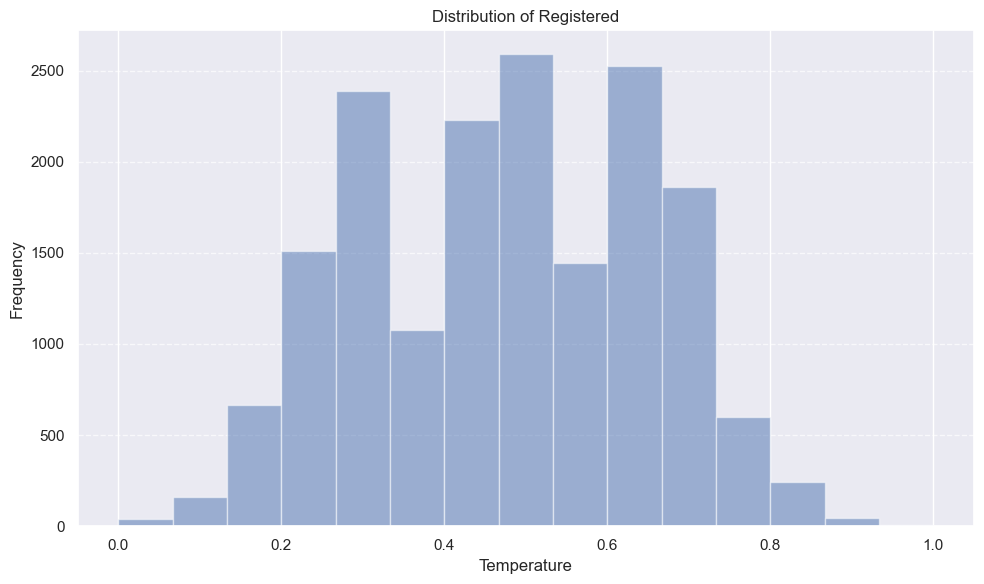

In [22]:
#ANSWER
#Create Histogram for continuous variables. For Example atemp
bikes['atemp'].plot.hist(
    bins = 15,
    alpha = 0.5,
    title = 'Distribution of Registered',
    xlabel = 'Temperature',
    ylabel = 'Frequency'
)

#Display the plot
plt.grid(axis='y', linestyle = '--', alpha =0.7) # plot grid for easier reading
plt.tight_layout() # prevent labels from overlapping
plt.show()

What do the horizontal and vertical axes represent?

ANSWER:
Horizontal Axes = Variables (Atemp), 
Vertical Axes = Counts of Sample

*NOTE: Samples in a given bin are greater than the axis value of its left side and less than or equal to the axis value of its right side. (The left-most bin is an exception: it represents greater than or equal to.)*

The box-and-whisker plot provides a compact view of the major percentiles of the distribution:

**Make a box and whisker plot for the column ``atemp``.**  

> The box extends from the lower to
upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data.  Flier points are those past the end of the whiskers.

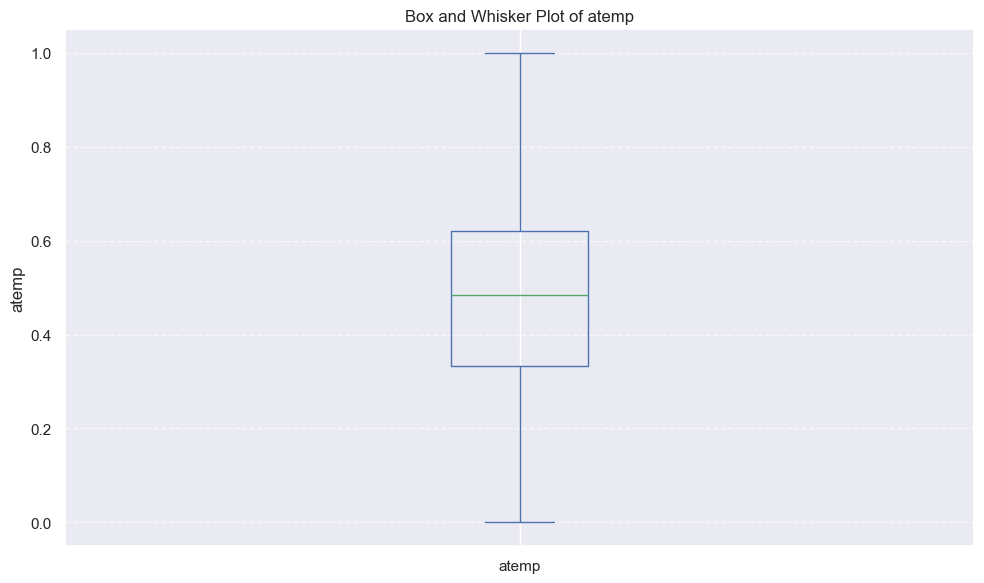

In [28]:
#ANSWER
#Plot the box and whisker for atemp
bikes['atemp'].plot.box(
    title = 'Box and Whisker Plot of atemp',
    ylabel = 'atemp'
)

#Display the plot
plt.grid(axis = 'y', linestyle='--', alpha = 0.7) # Plot Grid for easier reading
plt.tight_layout() # prevent labels from overlapping
plt.show()

This kind of plot really shines when we want to show several distributions at once (as long as they have compatible ranges).

**Plot `atemp` and `windspeed` together. Change labels accordingly.**

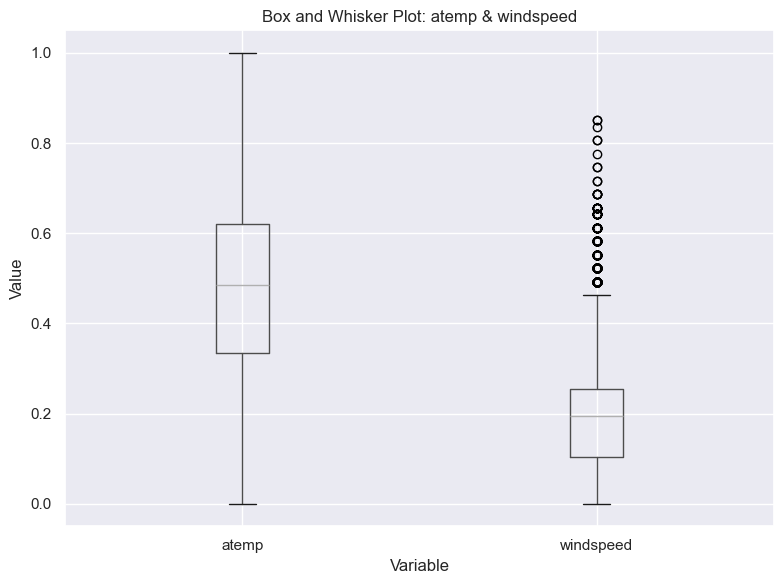

In [31]:
#ANSWER
#Plot 2 variables in 1 plot.
bikes.boxplot(column = ['atemp','windspeed'],
              figsize =(8,6),
              grid = True)
#Add title and labels
plt.title('Box and Whisker Plot: atemp & windspeed')
plt.ylabel('Value')
plt.xlabel('Variable')
#Display Plot
plt.tight_layout() # prevent labels overlapping
plt.show()

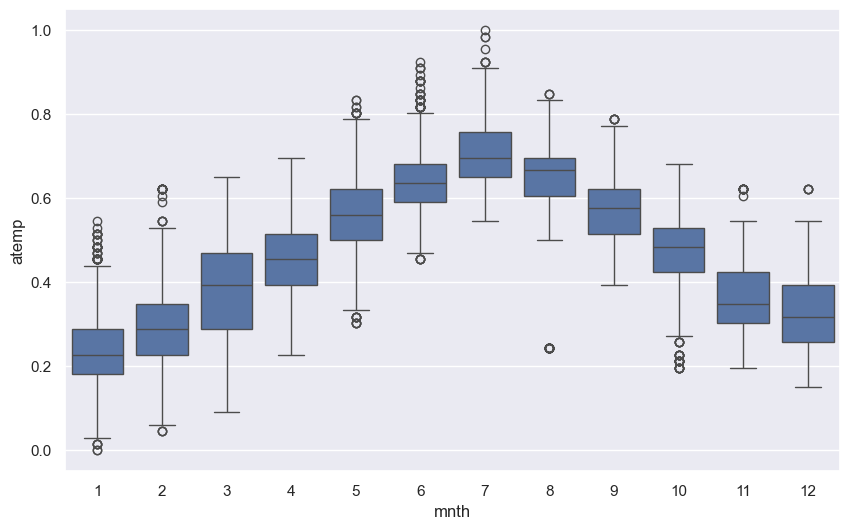

In [33]:
# Plot the boxplot with different month
sns.boxplot(x='mnth',y='atemp', data = bikes)
plt.show()

### Classified Data

Samples may represent different classes according to one or more categorical variables. Sometimes our goal is to discover these classes, or to train a classification model from samples that have been manually classified.

Here, the famous "Iris" dataset gets loaded from the UCI repository:

In [37]:
import urllib

# get Iris dataset from UCI Machine Learning Repository:
url = "http://goo.gl/HppjFh"
raw_data = urllib.request.urlopen(url)

# load the CSV file:
iris_data = pd.read_csv(raw_data, delimiter = ",",
                        names = ('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'))

Note that the column names were overridden by the `names` argument of the Pandas `read.csv` method. This requires prior knowledge of the dataset, which we would normally get from a data dictionary (although sometimes we just have to figure it out for ourselves).

**Print the first few rows of this DataFrame:**

In [41]:
#ANSWER
#Print the first few rows of the dataset
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In this dataset, `species` has several possible values (representing the classes of the samples).

**Find out distinct number of `species` and number of sample for each `species` in this dataset.**

In [44]:
#ANSWER
#Check the distinct number of Species.
distinct_species = iris_data['species'].nunique()
print(f"Distinct Number of Species: {distinct_species}")

#Check the sample number of Species.
number_species = iris_data['species'].value_counts()
print(f"Distinct Number of Species: {number_species}")

Distinct Number of Species: 3
Distinct Number of Species: species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


We often need to calculate aggregate values within subgroups of the dataset. The Pandas DataFrame method for this is `groupby`.

**Apply the `groupby` method to create a dataframe showing the `mean` of `sepal_length` and `sepal_width` by species for the above dataset.**

In [47]:
#ANSWER
#Create dataframe showing mean of sepal_length and sepal width by species
mean_by_species = iris_data.groupby('species')[['sepal_length','sepal_width']].mean()
print(f"Sepal Length & Sepal Width mean by Species: \n {mean_by_species}")

Sepal Length & Sepal Width mean by Species: 
                  sepal_length  sepal_width
species                                   
Iris-setosa             5.006        3.418
Iris-versicolor         5.936        2.770
Iris-virginica          6.588        2.974


**Using the dataframe generated by the previous `groupby` method, draw a barplot showing sepal width and length for each species using the Pandas plot method.**

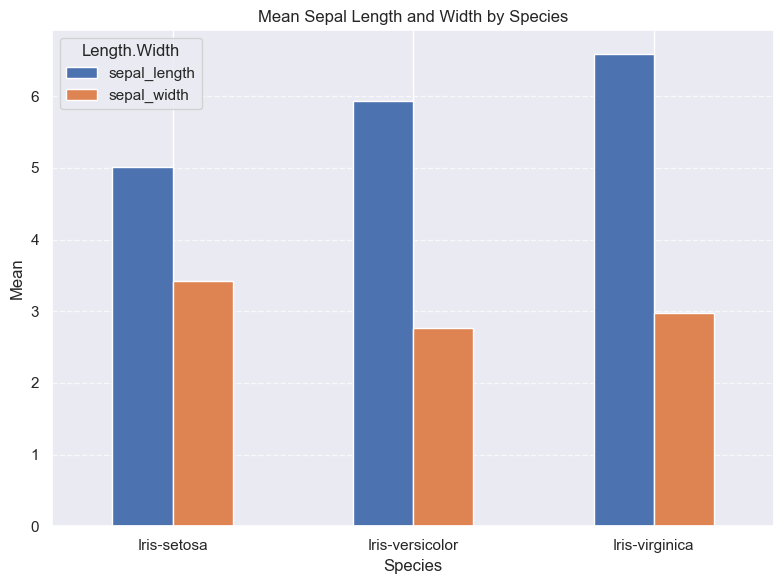

In [50]:
#ANSWER
#Draw the bar plot
mean_by_species.plot.bar(
    figsize = (8,6), # set the figure size
    rot= 0, # rotate the x-axis
    title="Mean Sepal Length and Width by Species",
    xlabel= 'Species',
    ylabel = 'Mean'
)

#Display the Plot
plt.grid(axis='y', linestyle='--', alpha = 0.7)
plt.legend(title = 'Length.Width') # add legend with title
plt.tight_layout()
plt.show()

Draw a Scatterplot showing sepal width and length using the Pandas plot method.

**[BONUS] Set `title`, `xlabel`, `ylabel` to the plot**

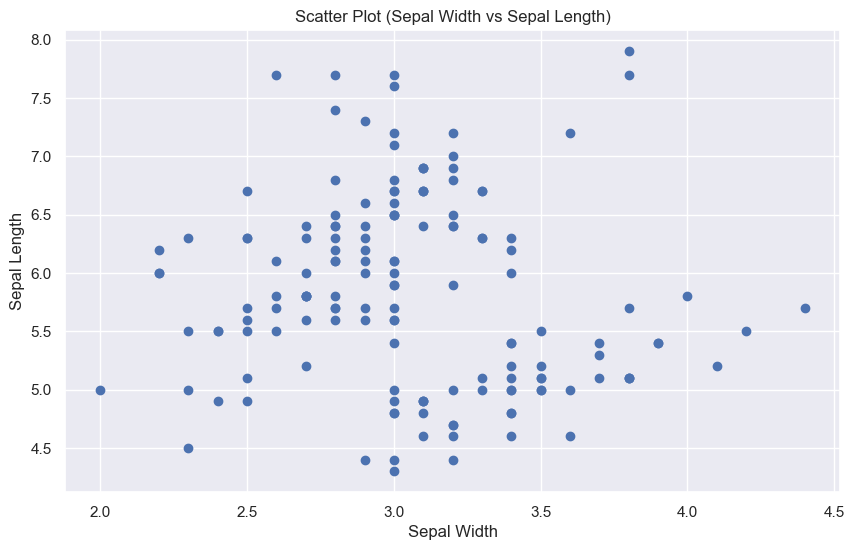

In [53]:
# Plot scatter using Pandas
plt.scatter(iris_data['sepal_width'], iris_data['sepal_length'])
plt.title('Scatter Plot (Sepal Width vs Sepal Length)')
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.show()

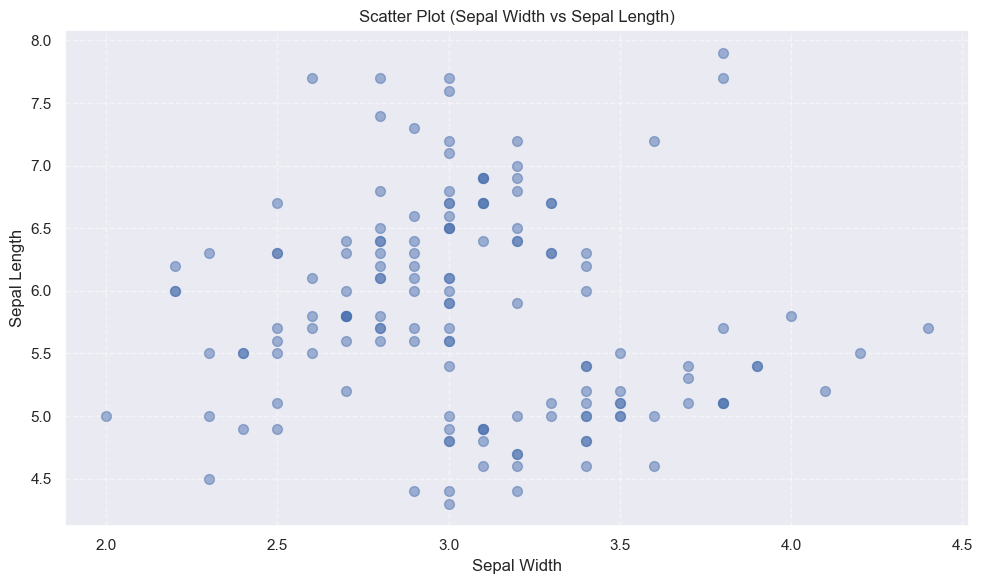

In [55]:
#ANSWER
#Plot the scatter plot of sepal width and length
iris_data.plot.scatter(
    x='sepal_width',
    y='sepal_length',
    title='Scatter Plot (Sepal Width vs Sepal Length)',
    xlabel= 'Sepal Width',
    ylabel = 'Sepal Length',
    s=50,
    alpha=0.5,
)

#Display the plot
plt.grid(True, linestyle='--', alpha = 0.5) # plot grid for easier reading
plt.tight_layout() # prevent label overlapping
plt.show()

In this case, we already have different species, so we can colour the points accordingly. This is easy to do using the Seaborn library. Try using `lmplot` of seaborn library and use the parameter `hue` and `fit_reg = False`.

**Draw a Scatterplot showing sepal width and length.**

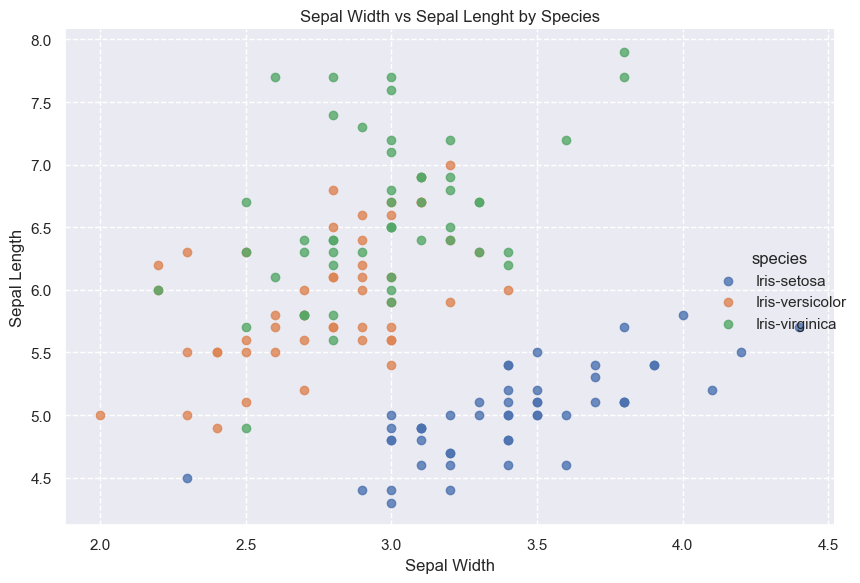

In [58]:
# ANSWER
# Draw a Scatterplot showing sepal width and length:
sns.lmplot(
    data = iris_data,
    x = 'sepal_width',
    y = 'sepal_length',
    hue = 'species', # Color by Species
    fit_reg = False, # Do not draw regression line
    height = 6, # height of the plot
    aspect = 1.2 # Aspect ratio
)

# Display the plot

plt.title('Sepal Width vs Sepal Lenght by Species')
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.grid(True, linestyle = '--') # for easier read
plt.tight_layout() # prevent label overlapping
plt.show()


**[BONUS] Draw a Scatterplot showing sepal width and length. Without using seaborn.**

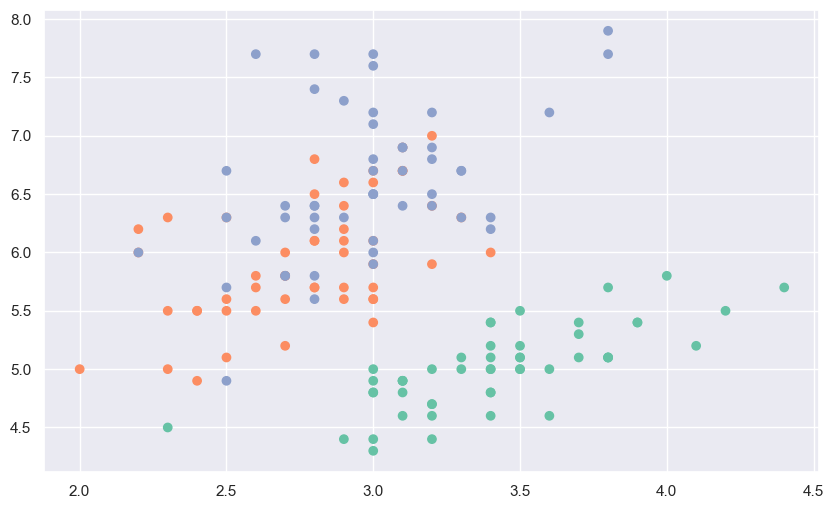

In [61]:
# Unique Cat label
color_labels = iris_data['species'].unique()
# list the rgb trip
rgb_values = sns.color_palette('Set2', 8)
# Map the label to rgb 
color_map = dict(zip(color_labels , rgb_values))
# show mapped values
plt.scatter(iris_data['sepal_width'], iris_data['sepal_length'], c=iris_data['species'].map(color_map))
plt.show()

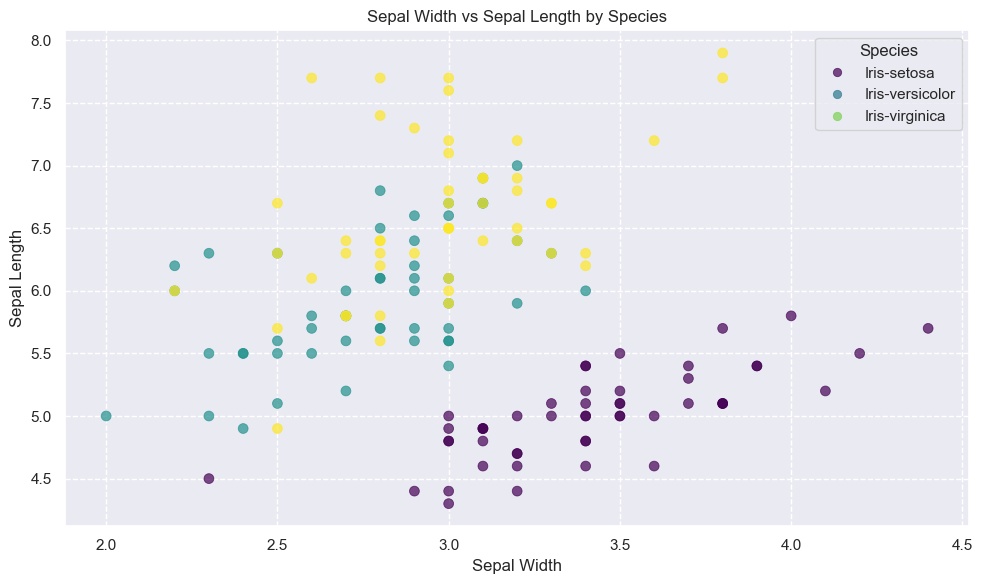

In [63]:
# ANSWER
# Draw a Scatterplot showing sepal width and length:
# Try without using Seaborn

#Change the species variable to category variable
species_cat = iris_data['species'].astype('category')

#Get the unique name
species_name = species_cat.cat.categories
#Get the numerical code
species_code = species_cat.cat.codes

plot = plt.scatter(
    x=iris_data['sepal_width'],
    y=iris_data['sepal_length'],
    c=species_code, #Convert species to numrical
    cmap = 'viridis',
    s=50,
    alpha=0.7,
    linewidth=0.6
)

# Add title and axis label
plt.title('Sepal Width vs Sepal Length by Species')
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')

# Creating Legend
handles, _ = plot.legend_elements(num=len(species_name))
plt.legend(handles = handles, labels=species_name.tolist(), title = 'Species')

# Display the plot
plt.grid(True, linestyle = '--')
plt.tight_layout()
plt.show()
    

To find out why this function is called `lmplot`, try it again with `fit_reg` = True:

**Draw a Scatterplot showing sepal width and length:**

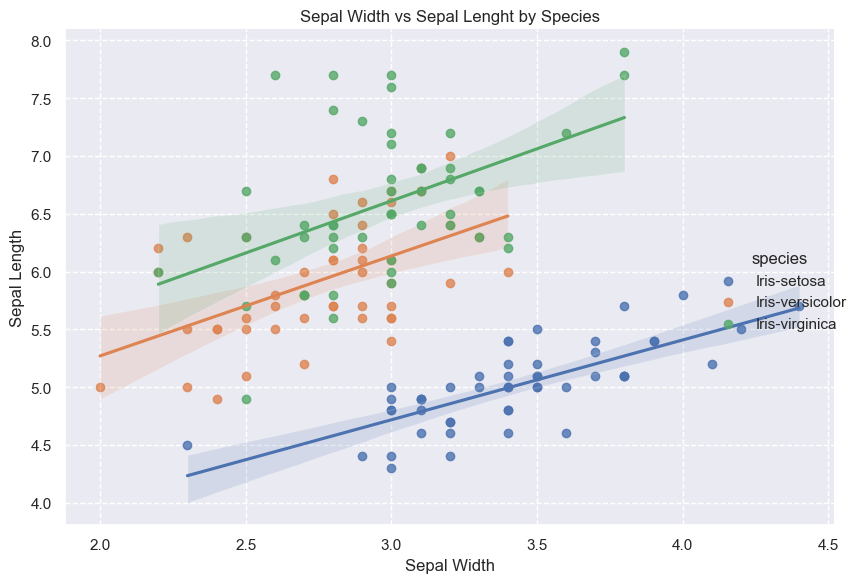

In [66]:
# ANSWER
# Draw a Scatterplot showing sepal width and length:
# Try with fit_reg = True
sns.lmplot(
    data = iris_data,
    x = 'sepal_width',
    y = 'sepal_length',
    hue = 'species', # Color by Species
    fit_reg = True, # Do not draw regression line
    height = 6, # height of the plot
    aspect = 1.2 # Aspect ratio
)

# Display the plot

plt.title('Sepal Width vs Sepal Lenght by Species')
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.grid(True, linestyle = '--') # for easier read
plt.tight_layout() # prevent label overlapping
plt.show()

The Seaborn `jointplot` function charts a correlation along with both distributions:

**Draw a jointplot showing sepal width and length:**

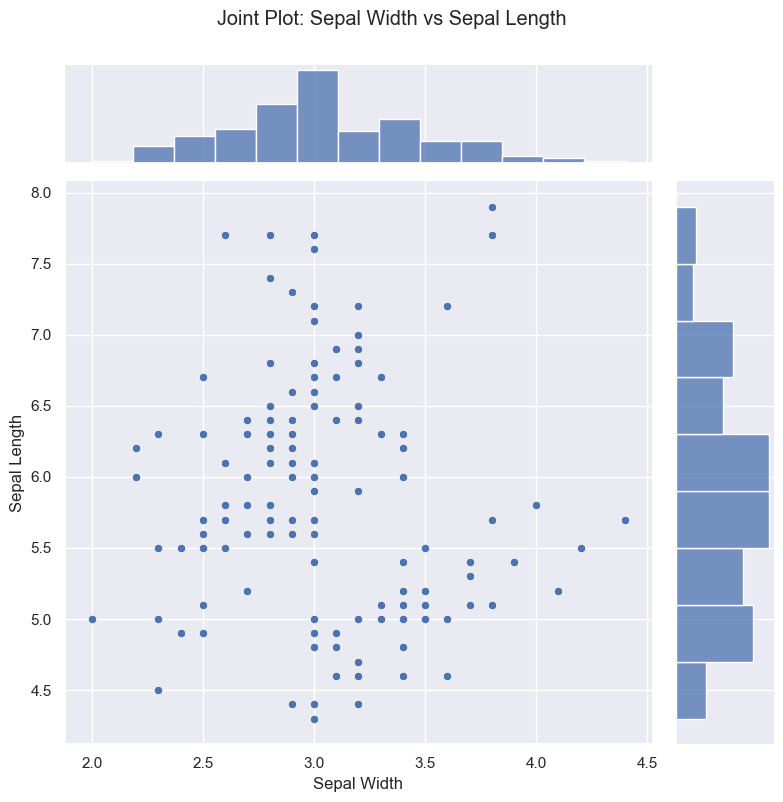

In [69]:
# ANSWER
# Create jointplot for sepal width and length
sns.jointplot(
    data=iris_data,
    x='sepal_width',
    y='sepal_length',
    kind = 'scatter',
    height = 8, # overall size of the plot 
    ratio = 5, # ration of the central plot area to the marginal axes
    space = 0.1 # space between central plot and marginal axes
)

# Display the plot
plt.suptitle('Joint Plot: Sepal Width vs Sepal Length', y = 1)
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.tight_layout()
plt.show()

When we want to see all the correlations at once, we can use `pairplot`:

**Draw a `pairplot` of the dataset:**

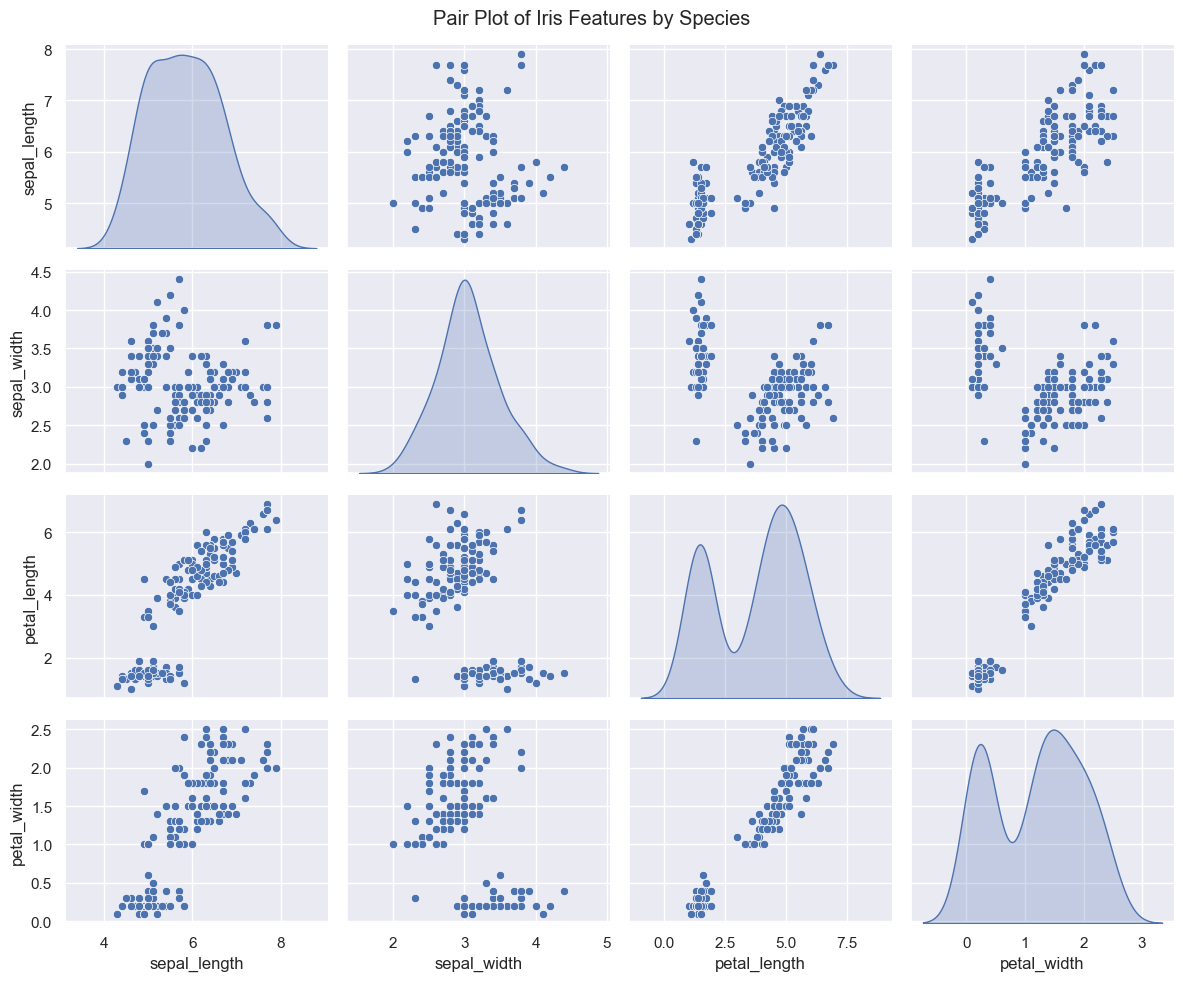

In [72]:
# ANSWER
# Pairplot for dataset
k = sns.pairplot(
    data = iris_data,
    diag_kind = 'kde', #Use Kernel Density Estimate for diagonal plots
    height=2.5,
    aspect = 1.2,
)

#Display the plot
plt.suptitle('Pair Plot of Iris Features by Species')
plt.tight_layout()
plt.show()

And, if the classes are known, we can apply colour using the `hue` parameter. Try this below:

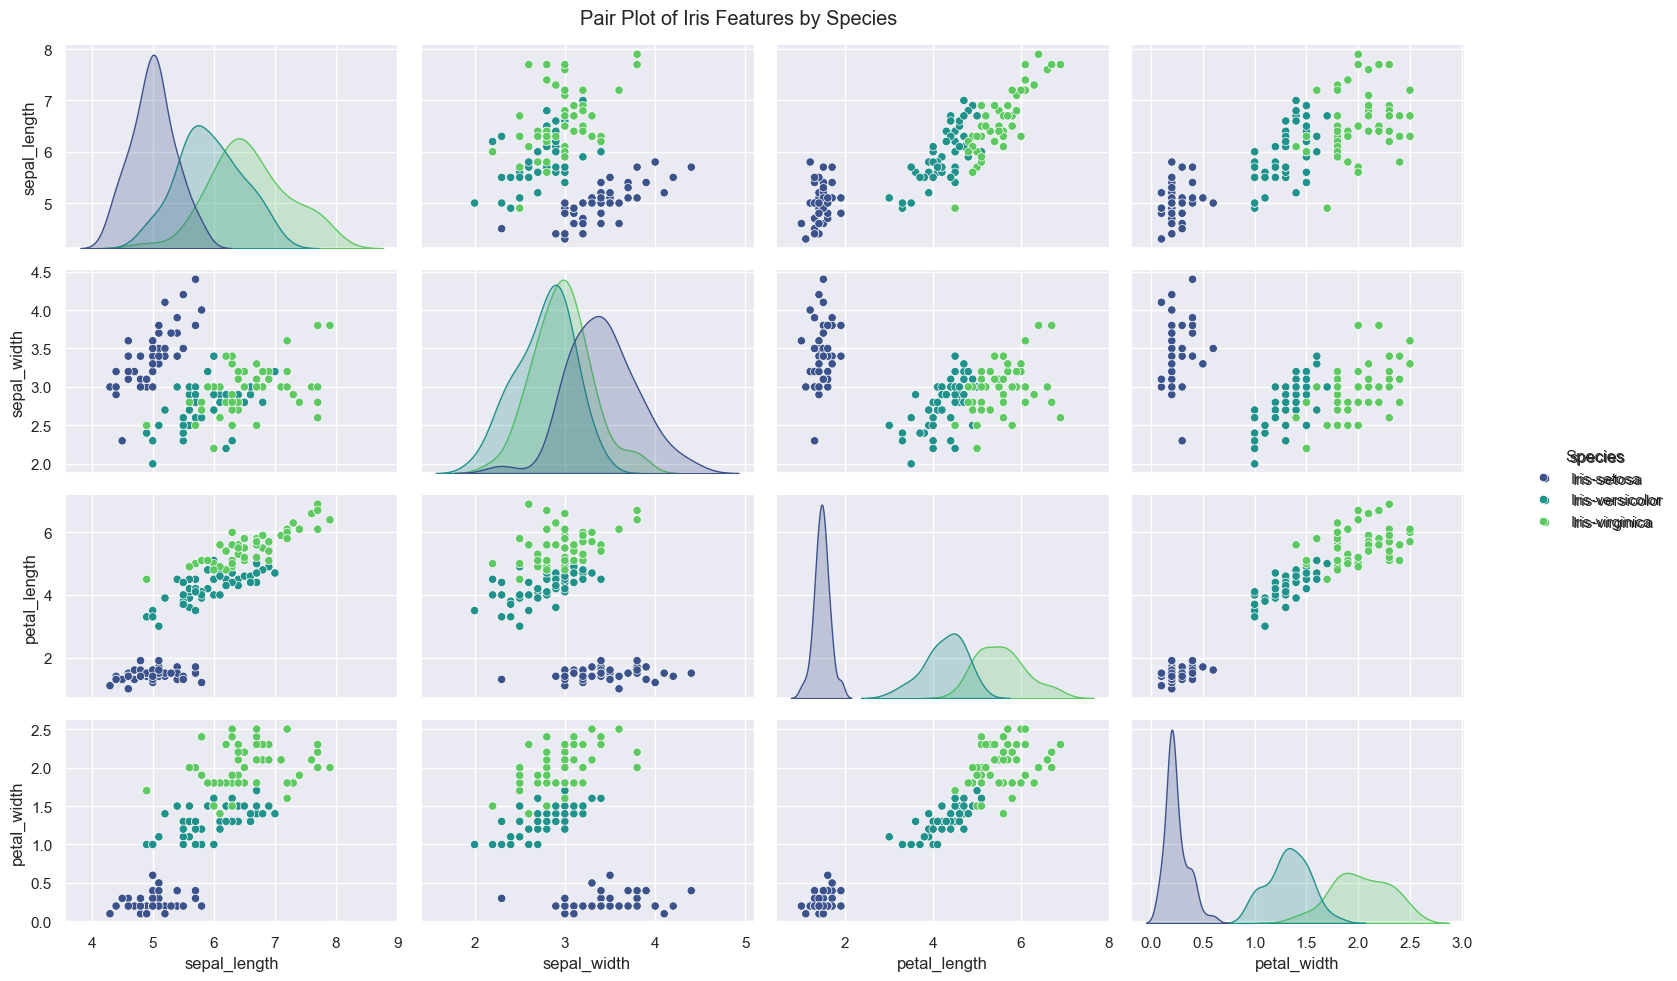

In [77]:
# ANSWER
# Pairplot for dataset with 'Species' as legend
k = sns.pairplot(
    data = iris_data,
    hue = 'species', # Color Points and distributions by 'Species'
    diag_kind = 'kde', #Use Kernel Density Estimate for diagonal plots
    height=2.5,
    aspect = 1.2,
    palette = 'viridis'
)

#Display the plot
k.add_legend(loc='center left', bbox_to_anchor=(1.02, 0.5), title='Species',
             fancybox=False, shadow=False, ncol=1) 
plt.suptitle('Pair Plot of Iris Features by Species')
plt.tight_layout()
plt.show()

Note that this gave us class-based distributions instead of an overall histogram, as well.

When we want to see numerical values of the correlations, the Pandas `corr` method provides a table of pair-wise correlations between the features in the DataFrame:

In [81]:
# ANSWER
# Show correlation of numeric Value
corr_matrix = iris_data.corr(numeric_only = True)
print(f"Correlation Matrix (Pairwise): \n {corr_matrix}")

Correlation Matrix (Pairwise): 
               sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


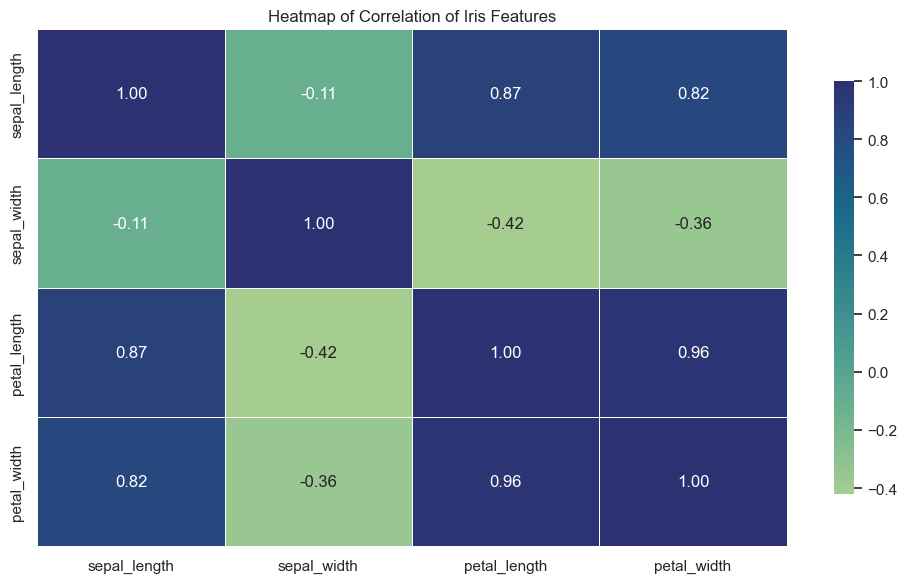

In [83]:
# plot the heatmap of correlation
sns.heatmap(
    corr_matrix,
    annot = True, # Displaying correlation value inside the heatmap cells
    cmap = 'crest',
    fmt = '.2f', # Displaying 2 decimal correlation value
    linewidth = 0.5,
    cbar_kws={"shrink": 0.8} #Shrink the colorbar to fit better
)

# Display the plot
plt.title('Heatmap of Correlation of Iris Features')
plt.tight_layout()
plt.show()
    

### High-Level Data Profiling Libraries

We need to master the basic data profiling functions because we will by using them frequently, for exploring data and answering ad hoc questions. In a production solution, we may need to incorporate specific data profiling code into our script so that we can automate data cleaning. However, when we just want to examine the data interactively before we start modelling, it is easier to use a high-level library like the following:

> pip install sweetviz

In [97]:
!pip install sweetviz

  Obtaining dependency information for sweetviz from https://files.pythonhosted.org/packages/89/50/8d3f7ca820267a38b42c64778db0f186d85cec6e3f0c5210eab9c16e783f/sweetviz-2.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources>=1.2.0 from https://files.pythonhosted.org/packages/a4/ed/1f1afb2e9e7f38a545d628f864d562a5ae64fe6f7a10e28ffb9b185b4e89/importlib_resources-6.5.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.1 MB 2.0 MB/s eta 0:00:08
    --------------------------------------- 0.2/15.1 MB 2.6 MB/s eta 0:00:06
    --------------------------------------- 0.4/15.1 MB 2.2 MB/s eta 0:00:07
   - -------------------------------------- 0.5/15.1 MB 2.6 MB/s eta 0:00:06
   - -------------------------------------- 0.7/15.1 MB 2.7 MB/s eta 0:00:06
   -- ------------------------------------- 

In [101]:
import sweetviz as sv
df = pd.read_csv("Meteorite_Landings.csv", encoding = 'UTF-8')

# Parse the 'year' column with the correct format '%m/%d/%Y %I:%M:%S %p'
df['year'] = pd.to_datetime(df['year'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Convert the parsed dates to the desired string format
df['year'] = df['year'].dt.strftime('%Y')

df.head(10)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.166670, -64.950000)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919,32.10000,71.80000,"(32.100000, 71.800000)"
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,1949,44.83333,95.16667,"(44.833330, 95.166670)"
7,Agen,392,Valid,H5,30000.0,Fell,1814,44.21667,0.61667,"(44.216670, 0.616670)"
8,Aguada,398,Valid,L6,1620.0,Fell,1930,-31.60000,-65.23333,"(-31.600000, -65.233330)"
9,Aguila Blanca,417,Valid,L,1440.0,Fell,1920,-30.86667,-64.55000,"(-30.866670, -64.550000)"


Use `analyze` and `show_html` of `sweetviz` to get an overview of the dataset.

In [107]:
# ANSWER
# Use analyze and show_html to get overview of dataset
data = sv.analyze(df)
data.show_html('data.html')

                                             |                                             | [  0%]   00:00 ->…

Report data.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Part 2: Time Series and Geospatial Data

### Time Series

A time series is basically a series or a data frame with a time-based index column. Working with time series introduces a lot of challenges and possibilities, but most tasks are catered for by the standard libraries in Python.

Here is a history of air passenger counts by month, loaded into an ordinary DataFrame:

In [87]:
airpass = pd.read_csv('AirPassengers.csv')
airpass.head()

,TravelDate,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


In [89]:
airpass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TravelDate  144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Before going any further, the `TravelDate` column needs to be converted to the `datetime` type.

In [92]:
# ANSWER
# Convert TravelDate to datetime
airpass['TravelDate'] = pd.to_datetime(airpass['TravelDate'], format = '%m/%d/%Y')
airpass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   TravelDate  144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


Set `TravelDate` as index

In [95]:
# ANSWER
# Set TravelDate as index
airpass = airpass.set_index('TravelDate')

Now, Pandas knows that the first column of this DataFrame is a datetime index, so it only shows one column of data:

Use `head` to check.

In [98]:
# ANSWER
airpass.head()

,Passengers
TravelDate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Here's how to see the values of the index:

In [101]:
airpass.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='TravelDate', length=144, freq=None)

If we had multiple data columns but we only wanted to work with a time series of one of them, we could pull that column into a 1D time series:

In [104]:
ts = airpass['Passengers']

We use the datetime index exactly like a row number index:

In [107]:
print(ts['1949-01-01'])

112


Or, we can refer to the row by its datetime equivalent:

In [110]:
from datetime import datetime
print(ts[datetime(1949,1,1)])

112


Happily, Pandas makes it easy to slice data at a courser grain. We can refer to a whole year of data by omitting the month and day form the index:

In [113]:
print(ts['1949'])

TravelDate
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: Passengers, dtype: int64


The most basic way to plot a time series is to let Pandas apply the default:

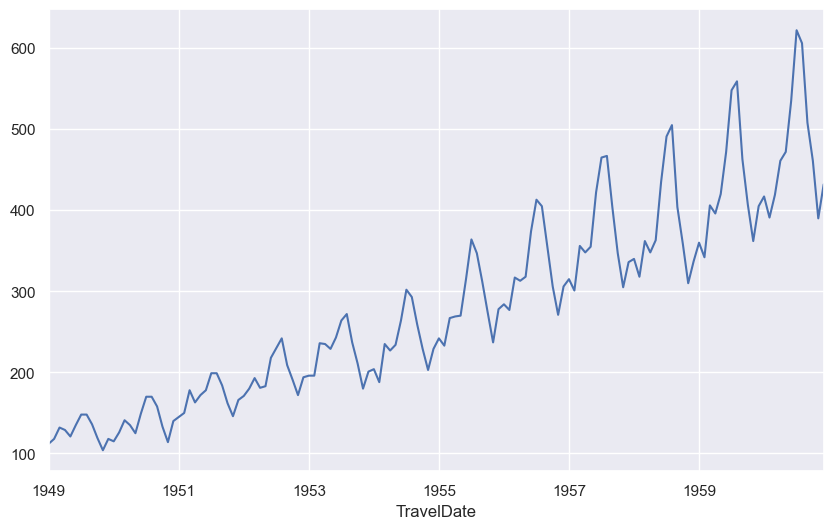

In [116]:
# Plot the time series
ts.plot();
plt.show()

### Geospatial Data

Geospatial data is map-based (although what constitutes a "map" can go beyond the familiar). Ultimately, geographic data  occurs either in bitmap (raster) form or vector (resizeable polygons). It is not unusual for the two kinds of data to be used together.

Because borders are often complex, following river courses, mountain ranges, and so on, the files that describe their geometries can be large. To reduce file sizes and image rendering times, we prefer to work with polygons that are no more detailed than the maximum resolution we need for our task. For this reason, geospatial files are often available at several different resolutions.

There are several popular options for working with maps in Python. We will use folium for its breadth and its use of open-source data.

In [153]:
!pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/be/2e/4dbe5577b7abcc8bc2fdef7e1b0e100ec654ecd47a2bede7ee1516f53f29/folium-0.19.7-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/f8/9d/91cddd38bd00170aad1a4b198c47b4ed716be45c234e09b835af41f4e717/branca-0.8.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/112.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/112.5 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/112.5 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 112.5/112.5 kB 1.3 MB/s eta 0:00:00


In [119]:
import folium

In [120]:
# Read SF Incidents data
crime_csv = 'SFPD_Incidents-Current_Year_2015.csv'
crime = pd.read_csv(crime_csv)
crime.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,150827188,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Sunday,09/20/2015,23:54,RICHMOND,UNFOUNDED,3000 Block of CLEMENT ST,-122.491851,37.781756,"(37.7817557255921, -122.491851328976)"
1,150827213,ASSAULT,INFLICT INJURY ON COHABITEE,Sunday,09/20/2015,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
2,150827213,ASSAULT,ATTEMPTED HOMICIDE WITH A KNIFE,Sunday,09/20/2015,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
3,150827213,ASSAULT,CHILD ABUSE (PHYSICAL),Sunday,09/20/2015,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
4,150827213,ASSAULT,MAYHEM WITH A KNIFE,Sunday,09/20/2015,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"


Convert `Date` Column to DateTime and set as index

In [124]:
# ANSWER
# Convert Date Column to DateTime and set as index
crime['Date'] = pd.to_datetime(crime['Date'], format = '%m/%d/%Y')
crime = crime.set_index('Date')
crime.head()

,IncidntNum,Category,Descript,DayOfWeek,Time,PdDistrict,Resolution,Address,X,Y,Location
Date,,,,,,,,,,,
2015-09-20,150827188,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Sunday,23:54,RICHMOND,UNFOUNDED,3000 Block of CLEMENT ST,-122.491851,37.781756,"(37.7817557255921, -122.491851328976)"
2015-09-20,150827213,ASSAULT,INFLICT INJURY ON COHABITEE,Sunday,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
2015-09-20,150827213,ASSAULT,ATTEMPTED HOMICIDE WITH A KNIFE,Sunday,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
2015-09-20,150827213,ASSAULT,CHILD ABUSE (PHYSICAL),Sunday,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"
2015-09-20,150827213,ASSAULT,MAYHEM WITH A KNIFE,Sunday,23:45,INGLESIDE,"ARREST, BOOKED",100 Block of LOEHR ST,-122.413676,37.712617,"(37.7126165766239, -122.413676487435)"


Draw a timeseries plot to visualise number of crimes for each day.

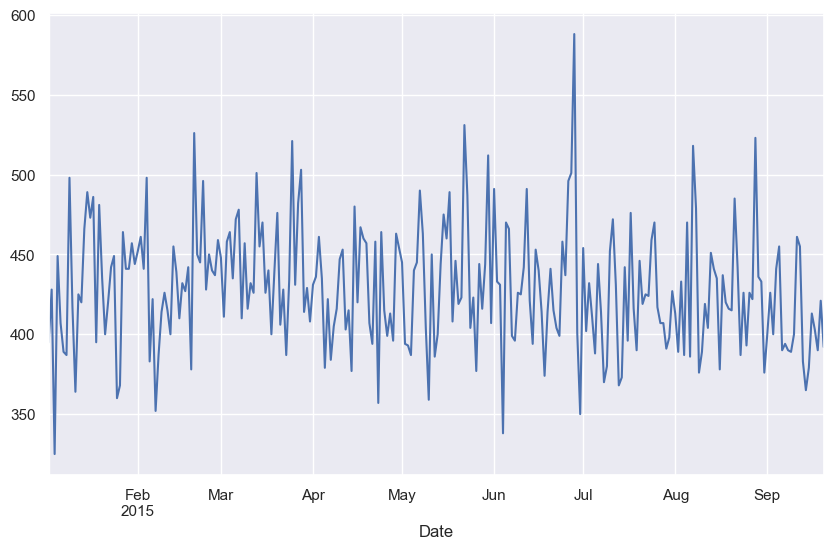

In [127]:
# ANSWER
# Visualize the number of crime
crime.groupby(crime.index).size().plot()
plt.show()

Using folium we can easily create a map. As it's SF data, by default we are using SF location.

In [130]:
def generateBaseMap(default_location=[37.76, -122.45], default_zoom_start=12):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location
        , control_scale = True
        , zoom_start = default_zoom_start
    )

    return base_map

In [132]:
base_map = generateBaseMap(default_location=[37.76, -122.45])
display(base_map)

Add a marker in the map using `Folium.Marker` for first 100 rows of the dataset.

In [135]:
# ANSWER
# make an empty map
sf_location = [37.76, -122.45]
m = generateBaseMap(default_location = sf_location)

# add marker 1 by 1 on map
for i in range(0, len(crime.head(100))):
    folium.Marker(location=[crime.iloc[i]['Y'],crime.iloc[i]['X']], popup=crime.iloc[i]['Category']).add_to(m)

# Show Map
m                    


Add a circle in the map using `Folium Circle` for first 100 rows of the dataset.

In [138]:
# ANSWER
# Make a new base map
basemap = folium.Map(location = [37.76, -122.45])

# Create circle marker
for i in range (0, len(crime.head(100))):
    folium.Circle(location = [crime.iloc[i]['Y'], crime.iloc[i]['X']], 
                              radius = 50
    ).add_to(basemap)
display(basemap)
    

[BONUS] Create a heatmap of the incident happened in SF.

**HOMEWORK** Explore Folium as much as you can.

**HOMEWORK** Explore GeoPandas

## More Resources

<a name="histfootnote">1</a>: [Histogram](https://en.wikipedia.org/wiki/Histogram)

The matplotlib users' guide is at https://matplotlib.org/stable/users/index.html.

For visualisation ideas and code see https://python-graph-gallery.com/:

2: GeoPandas

> The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in python that would otherwise require a spatial database such as PostGIS.

[GeoPandas 0.13.2](http://geopandas.org/index.html#)



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



